In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import PassiveAggressiveRegressor


from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Ethereum/ETH-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,155.286407,156.691299,151.225342,152.539688,152.539688,6565950868
1,2019-12-01,152.491928,152.491928,147.067932,151.185730,151.185730,7102780298
2,2019-12-02,151.175476,152.116959,147.606796,149.059158,149.059158,6670561362
3,2019-12-03,149.058243,150.310425,146.001678,147.956421,147.956421,6204379850
4,2019-12-04,147.918381,150.680817,145.000885,146.747742,146.747742,7865937094
...,...,...,...,...,...,...,...
1092,2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
1093,2022-11-27,1205.905273,1220.349487,1195.039063,1195.126953,1195.126953,4486976868
1094,2022-11-28,1194.960327,1198.737671,1156.062500,1170.086182,1170.086182,7275411870
1095,2022-11-29,1169.874390,1222.164185,1163.477539,1216.901245,1216.901245,7639405818


# **Data Pre-processing**

In [4]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [5]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

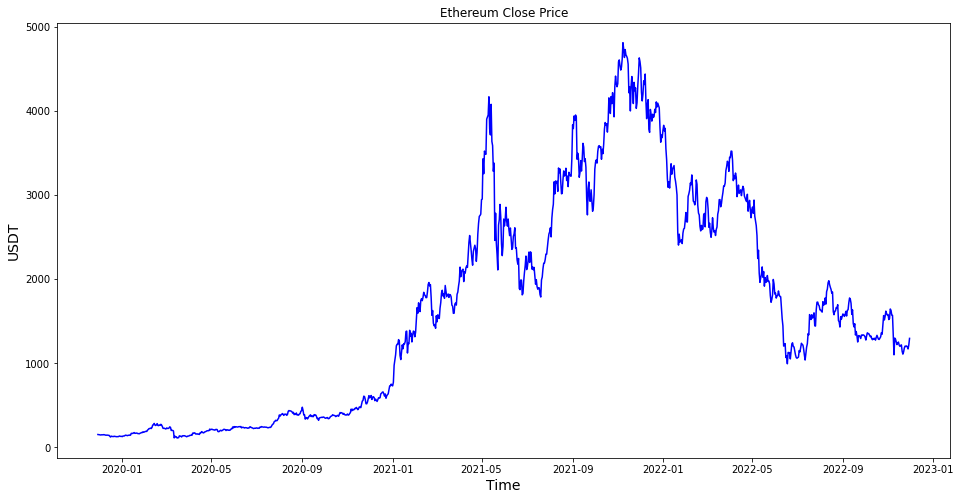

In [6]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="blue")
plt.title('Ethereum Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [7]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,155.286407,156.691299,151.225342,152.539688,152.539688,6565950868
1,2019-12-01,152.491928,152.491928,147.067932,151.185730,151.185730,7102780298
2,2019-12-02,151.175476,152.116959,147.606796,149.059158,149.059158,6670561362
3,2019-12-03,149.058243,150.310425,146.001678,147.956421,147.956421,6204379850
4,2019-12-04,147.918381,150.680817,145.000885,146.747742,146.747742,7865937094
...,...,...,...,...,...,...,...
846,2022-03-25,3108.448975,3183.958008,3087.490723,3106.671387,3106.671387,17030503831
847,2022-03-26,3106.405273,3146.825439,3091.825439,3143.178955,3143.178955,8876420740
848,2022-03-27,3143.795654,3291.577637,3129.997803,3291.577637,3291.577637,13431866834
849,2022-03-28,3292.322510,3424.019287,3279.027100,3336.634521,3336.634521,20620450770


In [8]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,3385.289307,3435.128418,3272.934570,3281.642822,3281.642822,17685495686
853,2022-04-01,3282.576172,3467.555908,3223.891357,3449.552246,3449.552246,20982988937
854,2022-04-02,3449.788574,3521.284668,3442.000244,3445.059326,3445.059326,23571556215
855,2022-04-03,3444.810547,3573.960205,3421.259766,3522.833496,3522.833496,15333808649
856,2022-04-04,3522.364990,3535.148193,3422.000977,3521.241211,3521.241211,18209969743
...,...,...,...,...,...,...,...
1092,2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
1093,2022-11-27,1205.905273,1220.349487,1195.039063,1195.126953,1195.126953,4486976868
1094,2022-11-28,1194.960327,1198.737671,1156.062500,1170.086182,1170.086182,7275411870
1095,2022-11-29,1169.874390,1222.164185,1163.477539,1216.901245,1216.901245,7639405818


# **Feature Engineering**

In [9]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,155.286407,156.691299,151.225342,152.539688,6565950868
1,152.491928,152.491928,147.067932,151.185730,7102780298
2,151.175476,152.116959,147.606796,149.059158,6670561362
3,149.058243,150.310425,146.001678,147.956421,6204379850
4,147.918381,150.680817,145.000885,146.747742,7865937094


In [10]:
#Normalizing training_data
scaler=MinMaxScaler()
training_data = scaler.fit_transform(training_data)
print(training_data.shape)

(851, 5)


In [11]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(training_data)*0.70)
test_size=len(training_data)-training_size
train_data,test_data=training_data[0:training_size],training_data[training_size:len(training_data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (595, 5)
test_data:  (256, 5)


In [12]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (564, 30)
y_train:  (564,)
X_test:  (225, 30)
y_test (225,)


# **Model Selection**

In [14]:
models = [LinearRegression(),
                svm.SVR(),
                RandomForestRegressor(n_estimators=30, n_jobs=-1, max_depth=20),
                DecisionTreeRegressor(),
                KNeighborsRegressor(),
                make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)),
                XGBRegressor(n_estimators=1000),
                PassiveAggressiveRegressor()
               ]

In [15]:
name = ['Linear Regression', 'Support Vector Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'KNeighborsRegressor', 'SGD Regressor', 'XGBRegressor', 'PassiveAggressiveRegressor']
mse = []
rmse = []
mae = []
r2 = []

for alg in models:
    
    alg.fit(X_train,y_train)
    y_pred=alg.predict(X_test)
    
    mse.append(mean_squared_error(y_test, y_pred))
    rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(sqrt(mean_absolute_error(y_test, y_pred)))   
    r2.append(r2_score(y_test, y_pred))  
    

results = pd.DataFrame({"Model Name": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2_SCORE": r2})
results

[08:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,MSE,RMSE,MAE,R2_SCORE
0,Linear Regression,0.001449,0.038069,0.170102,0.920365
1,Support Vector Regression,0.070606,0.265718,0.448448,-2.879783
2,Random Forest Regressor,0.010446,0.102207,0.274625,0.425979
3,Decision Tree Regressor,0.022785,0.150948,0.355347,-0.252055
4,KNeighborsRegressor,0.051648,0.227263,0.436766,-1.838075
5,SGD Regressor,0.002607,0.051055,0.198050,0.856768
6,XGBRegressor,0.019273,0.138827,0.323937,-0.059038
7,PassiveAggressiveRegressor,0.005750,0.075826,0.251680,0.684060


In [16]:
print(f"Highest R2 Score achieved by {results.R2_SCORE.idxmax(axis = 0)} at = {max(results['R2_SCORE'] )}")
print(f"Highest Mean Squared Error achieved by {results['MSE'].idxmin(axis = 0)} at = {min(results['MSE'])}")
print(f"Best Root Mean Square Error achieved by {results['RMSE'].idxmin(axis = 0)} at = {min(results['RMSE'])}")
print(f"Best Mean Absolute Error achieved by {results['MAE'].idxmin(axis = 0)} at = {min(results['MAE'] )}")

Highest R2 Score achieved by 0 at = 0.9203646903611916
Highest Mean Squared Error achieved by 0 at = 0.0014492367984623243
Best Root Mean Square Error achieved by 0 at = 0.03806884288315478
Best Mean Absolute Error achieved by 0 at = 0.17010181827552232


# **Performance Evaluation**

In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print("train_predict: ", train_predict.shape)
print("test_predict: ", test_predict.shape)

train_predict:  (564,)
test_predict:  (225,)


In [19]:
# Evaluation metrices RMSE, MSE and MAE for train data
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Train data R2 score:", r2_score(y_train, train_predict))


Train data RMSE:  0.016704194603465804
Train data MSE:  0.0002790301173504561
Train data MAE:  0.008323877144551796
Train data R2 score: 0.9929880633478203


In [20]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Test data RMSE:  0.03806884288315478
Test data MSE:  0.0014492367984623243
Test data MAE:  0.02893462858063882
Test data R2 score: 0.9203646903611916


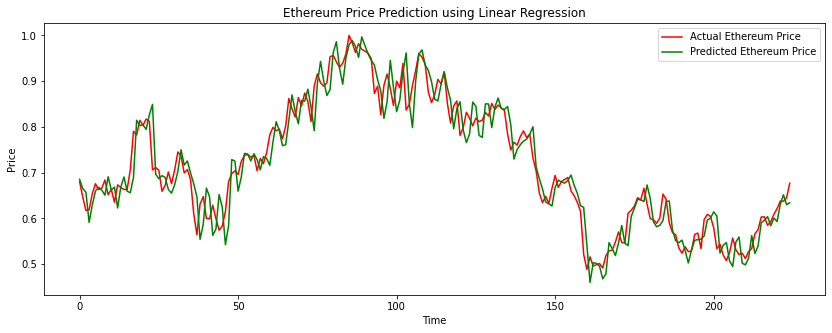

In [21]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual Ethereum Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()